# 一、安装MetaGPT

请确保你的系统已安装Python 3.9+。你可以通过以下命令进行检查：

In [ ]:
python3 --version

下面是具体的安装命令：

安装命令

In [ ]:
pip install metagpt

如果想安装特定版本

In [ ]:
pip install -i https://pypi.tuna.tsinghua.edu.cn/simple metagpt==0.5.2

如果想更新最新的版本和使用最新功能

In [ ]:
pip install git+https://github.com/geekan/MetaGPT

想看源代码，使用源代码

In [ ]:
git clone https://github.com/geekan/MetaGPT.git
cd /your/path/to/MetaGPT
pip install -e .

更多安装教程可参考官方教程
https://docs.deepwisdom.ai/zhcn/guide/get_started/installation.html#%E5%AE%89%E8%A3%85%E5%85%A8%E9%83%A8%E5%8A%9F%E8%83%BD

# 二、配置MetaGPT

这里使用OpenAI API，所以你首先需要有一个OpenAI的Key。

配置的内容包括三个：

OPENAI_API_KEY：你的OpenAI Key

OPENAI_API_MODEL：将要使用的大模型，例如“gpt-3.5-turbo”

OPENAI_API_BASE：服务地址，如果用中转服务，必填

下面将配置的内容加入工程中。MetaGPT官方提供的配置方式有3种：

环境变量

config/key.yaml

config/config.yaml

MetaGPT将会按照下述优先级来读取你的配置：config/key.yaml > config/config.yaml > environment variable

## 我这里使用环境变量的方式。

（1）创建一个工程目录 MyMetaGPT，用VSCode打开

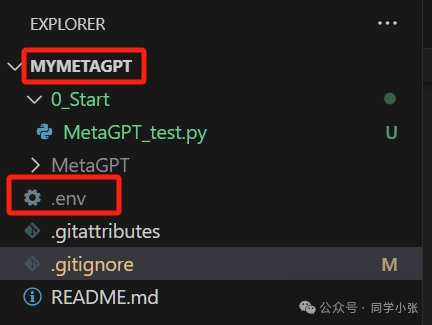

（2）新建一个.env文件，将以上配置填加到该文件中

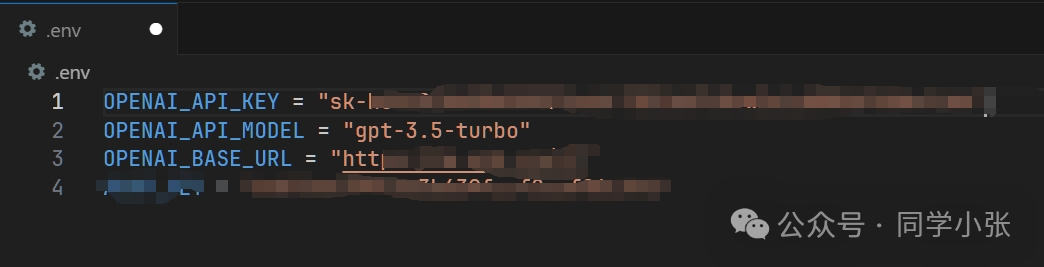

在Python文件（MetaGPT_test.py）中将该.env文件设置的内容加载到环境变量中：

In [ ]:
# 加载 .env 到环境变量
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())

# 三、运行第一个MetaGPT程序
我们将创建一个多智能体团队，根据我们的一句话需求编写一个二十一点的游戏软件。

（1）导入已实现的角色

In [ ]:
import asyncio
from metagpt.roles import (
    Architect,
    Engineer,
    ProductManager,
    ProjectManager,
)
from metagpt.team import Team

（2）初始化公司团队，配置对应的智能体，设置对应的预算以及提供一个写一个小游戏的需求。

In [ ]:
async def startup(idea: str):
    company = Team()
    company.hire(
        [
            ProductManager(),
            Architect(),
            ProjectManager(),
            Engineer(),
        ]
    )
    company.invest(investment=3.0)
    company.start_project(idea=idea)

    await company.run(n_round=5)

（3）运行

In [ ]:
asyncio.run(startup(idea="write a cli blackjack game")) # blackjack: 二十一点

运行成功后，可以看到输出结果：

运行过程

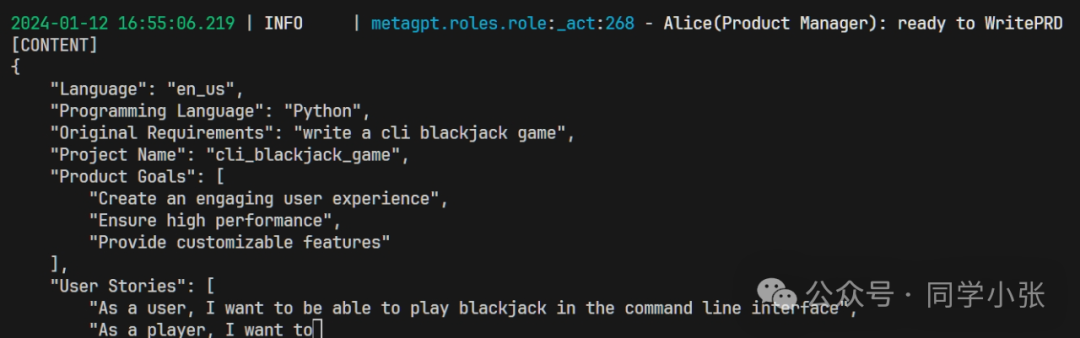

运行结束之后在工程目录下会出现一个workspace文件夹，里面就是生成的游戏代码

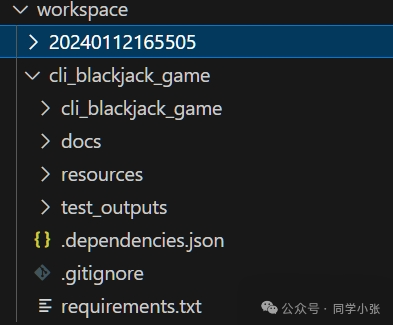

# 四、让我们来看下它写出来的程序怎么样

运行它生成的main.py文件，可以运行成功，然后跟它玩21点游戏，我输了。

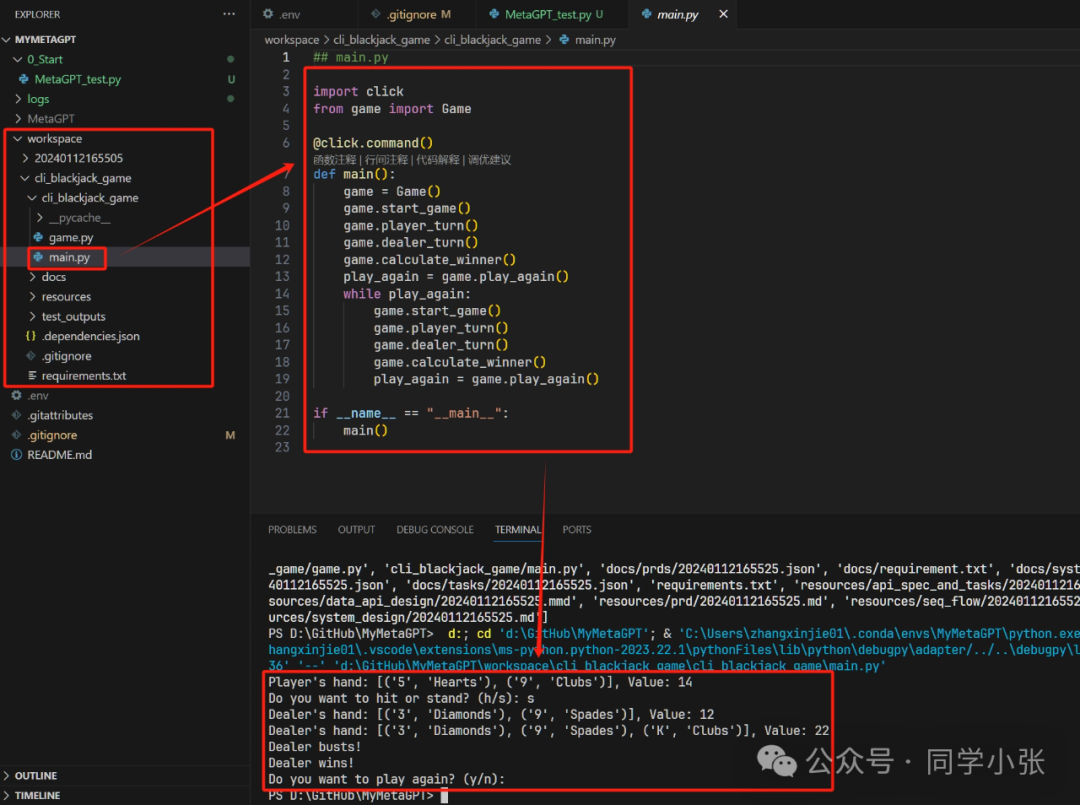

功能还是很强大的，整个过程我们只输入了一句话“write a cli blackjack game”。


# 五、运行时可能遇到的问题
（1）MetaGPT中用的OpenAI接口好像是<1.0，所以不要安装>1.0的版本，否则无法运行。这就需要Anaconda这样的虚拟环境进行环境隔离，以避免影响到你需要使用openai > 1.0接口的其它项目运行。

（2）运行过程中报错如下，可参考 这篇文章（http://mp.weixin.qq.com/s?__biz=MzkxNjYyMjkwMQ==&mid=2247484103&idx=1&sn=f2566a34716ba9661300e564500946d4&chksm=c14c599df63bd08b4fd858bf6daaa23ff0f7829db1ace636aa0f5522cf3f9e917a1e74a2ad85&scene=21#wechat_redirect） 解决。

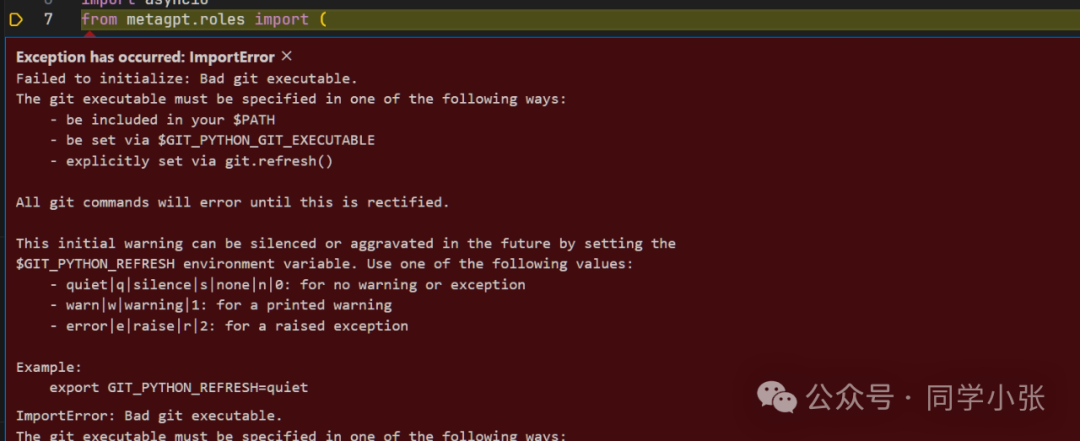